In [10]:
%matplotlib inline

import nltk
import pandas as pd
import sqlite3
from nltk.corpus import stopwords
from nltk import FreqDist
from collections import Counter
from collections import OrderedDict

In [2]:
con=sqlite3.connect("/Users/xiaoweichen/Kaggle/ClintonEmails/data/database.sqlite")

In [3]:
query_text="SELECT ExtractedBodyText FROM Emails"
raw_text=pd.read_sql_query(query_text,con)

In [4]:
# Read in country list
raw_countries=pd.read_csv("/Users/xiaoweichen/Kaggle/ClintonEmails/iso_3166_2_countries.csv")
country_list=list(raw_countries["Common Name"])
country_list=[country.lower() for country in country_list]

In [5]:
def extract_country(raw_email_text,country_list):
    email_text_lower=raw_email_text.lower()
    email_words=nltk.word_tokenize(email_text_lower)
    country_in_email=[word for word in email_words if word in country_list]
    return country_in_email

# Remove stopwords from email text
countries_mentioned=raw_text['ExtractedBodyText'].apply(lambda x:extract_country(x,country_list))

/Users/xiaoweichen/AnacondaPython/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal


In [6]:
# Combine all text into one string
countries_mentioned_list=[]
for index,string in countries_mentioned.iteritems():
    for word in string:
        if len(word)!=0:
            countries_mentioned_list.append(word)

In [7]:
country_freq=nltk.FreqDist(countries_mentioned_list)

In [12]:
country_freq.most_common(20)

[(u'israel', 499),
 (u'afghanistan', 392),
 (u'iran', 320),
 (u'haiti', 242),
 (u'pakistan', 211),
 (u'iraq', 195),
 (u'libya', 168),
 (u'india', 125),
 (u'ireland', 110),
 (u'russia', 83),
 (u'germany', 69),
 (u'palau', 68),
 (u'mexico', 68),
 (u'egypt', 60),
 (u'honduras', 51),
 (u'indonesia', 50),
 (u'turkey', 45),
 (u'brazil', 45),
 (u'france', 41),
 (u'sudan', 40)]

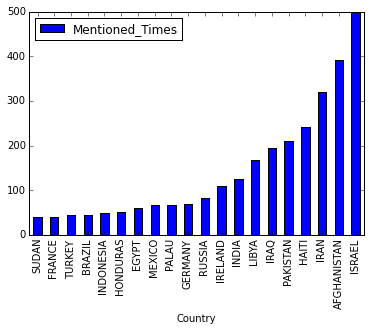

In [19]:
# Plot top 20 most-frequently-mentioned country
top_country_freq={}
for country,times in country_freq.most_common(20):
    top_country_freq[country.upper()]=times 

result_set=pd.DataFrame({"Country":top_country_freq.keys(),"Mentioned_Times":top_country_freq.values()})
result_set.sort_values(by="Mentioned_Times").plot(kind='bar',x="Country",y="Mentioned_Times")